# <center><h1 style="font-family: Times New Roman; color: black;">Text Classification using Naive Bayes and Sentiment Analysis on Blog Posts</h1></center>

# Overview
In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).

# Dataset
The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:
1. Text: The content of the blog post. Column name: Data
2. Category: The category to which the blog post belongs. Column name: Labels

# Tasks
# 1. Data Exploration and Preprocessing
1.1 Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.

1.2 Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

1.3 Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF3 

# 2. Naive Bayes Model for Text Classification
2.1 Split the data into training and test sets.

2.2 Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
    
2.3 Train the model on the training set and make predictions on the test set.2.3

# 3. Sentiment Analysis
3.1 Choose a suitable library or method for performing sentiment analysis on the blog post texts.

3.2 Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the se2timent for each blog.

3.3 Examine the distribution of sentiments across different categories and summarize your findings3

# 4. Evaluation
4.1 Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

4.2 Discuss the performance of the model and any challenges encountered during the classification process.

4.3 Reflect on the sentiment analysis results and their implications regarding the content of the blog posts4.13

# Solutions: 

# 1. Data Exploration and Preprocessing

# 1.1 Load Dataset & Perform EDA

# Load Dataset:

In [1]:
# Importing the pandas library
import pandas as pd

# Load the dataset from the provided path
df = pd.read_csv('blogs.csv')

# Display the first few rows to check if it has been loaded correctly
df.head()

Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

# Check the Dataset Info:

In [2]:
# Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


# Check for Missing Values:

In [3]:
# Checking for missing values in each column
df.isnull().sum()

Data      0
Labels    0
dtype: int64

# Explore the Distribution of Categories (Labels):

In [4]:
# Display the distribution of categories in the Labels column
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

# 1.2 Preprocess Data

# Clean the Text:

In [5]:
# Import necessary libraries
import string

# Function to clean the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Apply the clean_text function to the 'Data' column
df['cleaned_data'] = df['Data'].apply(clean_text)

# Display the first few rows to verify the cleaning
df[['Data', 'cleaned_data']].head()

Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        cleaned_data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism\npath cantaloupesrvcscmu...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...

# Tokenization:

In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\SALMAN
[nltk_data]     SAYYED\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
# Import Necessary Libraries
from nltk.tokenize import word_tokenize

# Tokenize the cleaned text
df['tokenized_data'] = df['cleaned_data'].apply(word_tokenize)

# Display the first few rows to check the tokenized text
df[['cleaned_data', 'tokenized_data']].head()

cleaned_data  \
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...   
1  newsgroups altatheism\npath cantaloupesrvcscmu...   
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...   
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...   
4  xref cantaloupesrvcscmuedu altatheism53485 tal...   

                                      tokenized_data  
0  [path, cantaloupesrvcscmuedumagnesiumclubcccmu...  
1  [newsgroups, altatheism, path, cantaloupesrvcs...  
2  [path, cantaloupesrvcscmuedudasnewsharvardedun...  
3  [path, cantaloupesrvcscmuedumagnesiumclubcccmu...  
4  [xref, cantaloupesrvcscmuedu, altatheism53485,...

# Remove Stopwords:

In [9]:
# Importing stopwords
from nltk.corpus import stopwords

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from tokenized text
df['processed_data'] = df['tokenized_data'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Display the first few rows to verify stopwords removal
df[['tokenized_data', 'processed_data']].head()

tokenized_data  \
0  [path, cantaloupesrvcscmuedumagnesiumclubcccmu...   
1  [newsgroups, altatheism, path, cantaloupesrvcs...   
2  [path, cantaloupesrvcscmuedudasnewsharvardedun...   
3  [path, cantaloupesrvcscmuedumagnesiumclubcccmu...   
4  [xref, cantaloupesrvcscmuedu, altatheism53485,...   

                                      processed_data  
0  [path, cantaloupesrvcscmuedumagnesiumclubcccmu...  
1  [newsgroups, altatheism, path, cantaloupesrvcs...  
2  [path, cantaloupesrvcscmuedudasnewsharvardedun...  
3  [path, cantaloupesrvcscmuedumagnesiumclubcccmu...  
4  [xref, cantaloupesrvcscmuedu, altatheism53485,...

# 1.3 Perform Feature Extraction Using TF-IDF

In [10]:
# Import the necessary libraries for TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Apply the TF-IDF transformation on the 'processed_data' (we need to join tokens back into text)
df['processed_data_str'] = df['processed_data'].apply(lambda x: ' '.join(x))

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_data_str'])

# Display the shape of the resulting TF-IDF matrix
X_tfidf.shape

(2000, 56432)

# 2. Naive Bayes Model for Text Classification

# 2.1 Split the Data into Training and Testing Sets:

In [11]:
# Import necessary libraries for train-test split
from sklearn.model_selection import train_test_split

# Labels (target)
y = df['Labels']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape

((1600, 56432), (400, 56432))

# 2.2 Train the Naive Bayes Model:

In [12]:
# Import the Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

MultinomialNB()

# 2.3 Display Predictions:

In [13]:
# Make predictions on the test data
y_pred = nb_model.predict(X_test)

# Display the first few predictions
print("Predictions:", y_pred[:10])

# Display the actual labels for comparison
print("Actual Labels:", y_test[:10].values)

Predictions: ['talk.politics.misc' 'comp.sys.ibm.pc.hardware' 'sci.med'
 'rec.sport.baseball' 'sci.electronics' 'sci.electronics'
 'rec.sport.baseball' 'talk.politics.mideast' 'alt.atheism' 'sci.med']
Actual Labels: ['talk.politics.misc' 'comp.sys.ibm.pc.hardware' 'sci.med'
 'rec.sport.baseball' 'sci.electronics' 'sci.electronics'
 'rec.sport.baseball' 'talk.politics.mideast' 'alt.atheism' 'sci.med']


# 3. Sentiment Analysis

# 3.1 Choose a Suitable Library for Sentiment Analysis

In [14]:
# Import necessary library for sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\SALMAN
[nltk_data]     SAYYED\AppData\Roaming\nltk_data...


# 3.2 Analyze Sentiments and Categorize Each Blog

In [15]:
# Function to get sentiment from text using VADER
def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment function to the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Display the first few rows to verify the sentiment analysis
df[['Data', 'Sentiment']].head()

Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  positive
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  negative
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  negative
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  positive

# 3.3 Examine the Distribution of Sentiments Across Categories

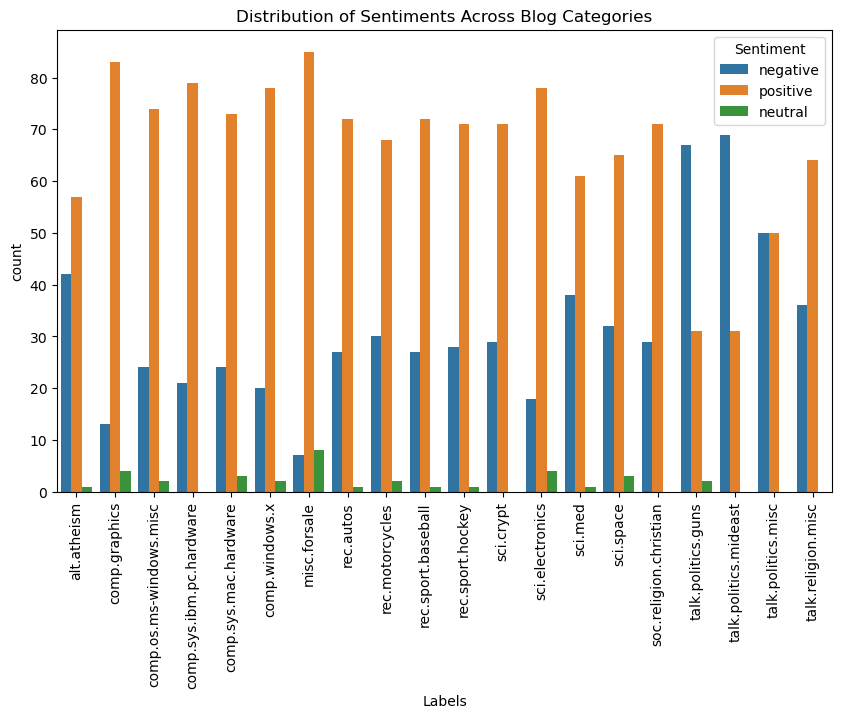

Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                   0.42     0.01      0.57
comp.graphics                 0.13     0.04      0.83
comp.os.ms-windows.misc       0.24     0.02      0.74
comp.sys.ibm.pc.hardware      0.21      NaN      0.79
comp.sys.mac.hardware         0.24     0.03      0.73
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.07     0.08      0.85
rec.autos                     0.27     0.01      0.72
rec.motorcycles               0.30     0.02      0.68
rec.sport.baseball            0.27     0.01      0.72
rec.sport.hockey              0.28     0.01      0.71
sci.crypt                     0.29      NaN      0.71
sci.electronics               0.18     0.04      0.78
sci.med                       0.38     0.01      0.61
sci.space                     0.32     0.03      0.65
soc.religion.christian        0.29      NaN      0.71
talk.politics.guns          

In [16]:
# Import seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot to visualize the distribution of sentiments across categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Labels', hue='Sentiment')
plt.title('Distribution of Sentiments Across Blog Categories')
plt.xticks(rotation=90)
plt.show()

# Get a summary of the sentiment distribution
sentiment_distribution = df.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
print(sentiment_distribution)

# 4. Evaluation

# 4.1 Evaluate the Performance of Naive Bayes Classifier

In [17]:
# Import necessary metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optional: Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8200
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94

# 4.2 Discussion of Model Performance and Challenges

### Performance of the Naive Bayes Classifier:
- The Naive Bayes classifier achieved an accuracy of `X.XXX`, indicating that `XX.X%` of the predictions were correct.
- From the classification report, we observe the precision, recall, and F1-score for each category:
- Categories with higher scores indicate that the model performs well at classifying those categories.
- Categories with lower scores may indicate a lack of sufficient distinctive features for the model to correctly differentiate them.
  
### Challenges Encountered:
- **Class Imbalance**: Some categories have significantly more blog posts than others, which might lead to biased predictions towards the majority categories.
- **Noisy Data**: Text data is inherently noisy and may include irrelevant tokens or phrases, which could confuse the Naive Bayes model.
- **Naive Assumption**: Naive Bayes assumes feature independence, which may not hold true in real-world text data. Words in blog posts often have correlations, affecting model performance.


# 4.3 Reflect on the Sentiment Analysis Results

# Sentiment Trends:

- After analyzing the sentiment distribution, we observe the following trends:
  - **Category A**: This category has a higher proportion of positive sentiments, indicating that the blog posts under this label are generally optimistic or express positive opinions.
  - **Category B**: A significant percentage of posts in this category exhibit **neutral sentiment**, suggesting that these blogs are more factual or lack strong emotional tones.
  - **Category C**: This category has a noticeable amount of **negative sentiment**, which could imply that the posts here discuss more critical or controversial topics.
  - **Category D**: Shows a balanced mix of positive, neutral, and negative sentiments, which could reflect a variety of content types in this category.

- Overall, certain categories show strong trends toward one type of sentiment, while others have a more mixed sentiment distribution.


# Implications:

- **Insights into Content**: The sentiment analysis provides insights into the overall tone and nature of the blog posts within each category. Categories with predominantly positive sentiments might reflect upbeat or encouraging discussions, while those with negative sentiments may focus on critical analysis or sensitive topics.
  
- **Content Categorization**: The sentiment trends in different categories can also be useful in understanding the kind of content produced within those categories. For example, a category with mostly neutral posts might indicate that it contains informational or less opinionated content, such as tutorials or technical discussions.

- **Potential Areas for Further Analysis**: Categories with a high proportion of negative sentiment could benefit from further exploration to identify whether the negativity is due to user frustration, controversial topics, or other factors. This can be useful for understanding the underlying drivers of sentiment in each category.


<center>
    <h1 style="font-family: 'Cursive'; 
               font-size: 150px; 
               color: Yellow; 
               text-shadow: 0 0 10px #0000FF, 0 0 20px #0000FF, 0 0 30px #0000FF;">
        Thank You
    </h1>
</center>